In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [43]:
data=pd.read_csv('titanic.csv')

In [44]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
data.shape

(891, 12)

In [46]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [47]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Missing values in Age, Cabin and Embarke

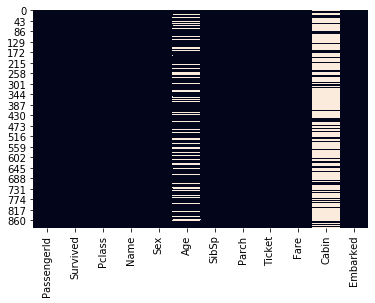

In [49]:
sns.heatmap(data.isnull(), cbar=False)

Let's see if there is any relation between Age & Survived and Cabin & Survived 

In [50]:
data.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


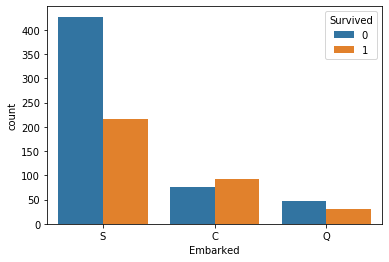

In [51]:
sns.countplot(data.Embarked,hue=data.Survived)

* Passenger with embarked 'S' survived.

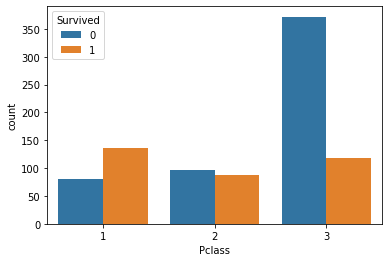

In [52]:
sns.countplot(data.Pclass,hue=data.Survived)

* Passenger from Pclass 1 were given priority in rescue

In [53]:
data.groupby('Survived').mean()['Fare']

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

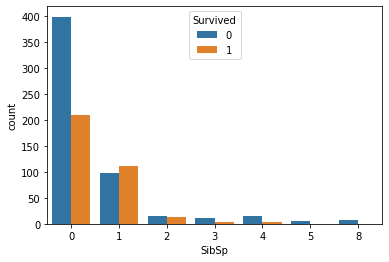

In [66]:
sns.countplot(data.SibSp,hue=data.Survived)

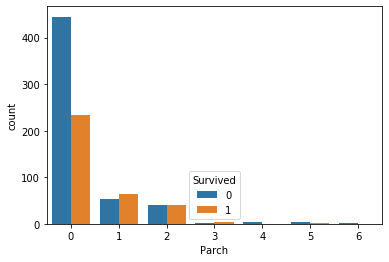

In [67]:
sns.countplot(data.Parch,hue=data.Survived)

# Handling missing values

In [54]:
data.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

* We can put missing age using above imformation

In [55]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [56]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [57]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
data.groupby('Embarked').mean()['Fare']

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [59]:
def impute_embarked(cols):
    Embarked = cols[0]
    Fare = cols[1]
    
    if pd.isnull(Embarked):

        if (Fare<13):
            return 'Q'

        elif (Fare>=27):
            return 'C'

        else:
            return 'S'

    else:
        return Embarked

In [60]:
data['Embarked'] = data[['Embarked','Fare']].apply(impute_embarked,axis=1)

In [61]:
data.drop('Cabin',axis=1,inplace=True)

In [62]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data preprocessing

In [64]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [72]:
data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [73]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [74]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

In [75]:
data['Sex_n']=Le.fit_transform(data['Sex'])

In [76]:
data['Embarked_n']=Le.fit_transform(data['Embarked'])

In [79]:
data.drop(['Sex','Embarked'],axis=1,inplace=True)

In [80]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_n,Embarked_n
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [83]:
X=data.drop('Survived',axis=1)
y=data.Survived

In [98]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model fitting

In [108]:
from sklearn.tree import DecisionTreeClassifier

DTC=DecisionTreeClassifier(criterion="entropy")

In [109]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [123]:
DTC.score(X_test,y_test)

0.9497206703910615

# Saving Model

In [124]:
import joblib as jb

In [125]:
jb.dump(DTC,'titanicmodel')

['titanicmodel']